<img align="right" style="padding-left:50px;" src="figures_wk4/data_cleaning.png" width=350><br>
### User Bias in Data Cleaning
For your homework assignment this week, we will explore how our treatment of our data can impact the quality of our results.

**Dataset:**
The data is a Salary Survey from AskAManager.org. It’s US-centric-ish but does allow for a range of country inputs.

A list of the corresponding survey questions can be found [here](https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html).

 

In [87]:
import pandas as pd

In [88]:
df= pd.read_csv('survey_data.csv')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28108 non-null  object 
 1   q1         28108 non-null  object 
 2   q2         28033 non-null  object 
 3   q3         28107 non-null  object 
 4   q4         7273 non-null   object 
 5   q5         28108 non-null  object 
 6   q6         20793 non-null  float64
 7   q7         28108 non-null  object 
 8   q8         211 non-null    object 
 9   q9         3047 non-null   object 
 10  q10        28108 non-null  object 
 11  q11        23074 non-null  object 
 12  q12        28026 non-null  object 
 13  q13        28108 non-null  object 
 14  q14        28108 non-null  object 
 15  q15        27885 non-null  object 
 16  q16        27937 non-null  object 
 17  q17        27931 non-null  object 
dtypes: float64(1), object(17)
memory usage: 3.9+ MB


In [90]:
df.head()

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Assignment
Your goal for this assignment is to observe how your data treatment during the cleaning process can skew or bias the dataset.

Before diving right in, stop and read through the questions associated with the dataset. As you can see, they are either free-form text entries or categorical selections. Knowing this, perform some exploratory data analysis (EDA) to investigate the "state" of the dataset.

[Add as many code cell below here as needs]


In [91]:
# Display missing values information
print("\n Missing Values Analysis ")
missing_vals = df.isnull().sum()
missing_percentages = (missing_vals / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_vals,
    'Percentage Missing': missing_percentages
})
print(missing_info)


 Missing Values Analysis 
           Missing Values  Percentage Missing
timestamp               0            0.000000
q1                      0            0.000000
q2                     75            0.266828
q3                      1            0.003558
q4                  20835           74.124804
q5                      0            0.000000
q6                   7315           26.024619
q7                      0            0.000000
q8                  27897           99.249324
q9                  25061           89.159670
q10                     0            0.000000
q11                  5034           17.909492
q12                    82            0.291732
q13                     0            0.000000
q14                     0            0.000000
q15                   223            0.793368
q16                   171            0.608368
q17                   177            0.629714


In [92]:
# Display value counts for categorical columns
def analyze_categorical_column(df, column_name, top_n=10):
    print(f"\n=== Value Counts for {column_name} (Top {top_n}) ===")
    value_counts = df[column_name].value_counts().head(top_n)
    print(value_counts)
    print(f"\nUnique Values Count: {df[column_name].nunique()}")


In [93]:
# Analyze key categorical columns
categorical_columns = ['q1', 'q2', 'q8', 'q11', 'q15', 'q16', 'q17']
for col in categorical_columns:
    analyze_categorical_column(df, col)


=== Value Counts for q1 (Top 10) ===
q1
25-34         12668
35-44          9908
45-54          3193
18-24          1236
55-64           994
65 or over       95
under 18         14
Name: count, dtype: int64

Unique Values Count: 7

=== Value Counts for q2 (Top 10) ===
q2
Computing or Tech                       4711
Education (Higher Education)            2466
Nonprofits                              2420
Health care                             1899
Government and Public Administration    1893
Accounting, Banking & Finance           1812
Engineering or Manufacturing            1700
Marketing, Advertising & PR             1136
Law                                     1097
Business or Consulting                   853
Name: count, dtype: int64

Unique Values Count: 1220

=== Value Counts for q8 (Top 10) ===
q8
INR    11
SGD    11
USD    11
NOK    10
DKK     8
MYR     8
AUD     7
BRL     6
PLN     5
CZK     4
Name: count, dtype: int64

Unique Values Count: 124

=== Value Counts for q11 (Top 1

In [94]:
# Analyze salary distribution
print("\n Salary Analysis ")
# Convert salary to numeric, handling non-numeric values
df['salary_numeric'] = pd.to_numeric(df['q6'], errors='coerce')
print("\nSalary Statistics:")
print(df['salary_numeric'].describe())


 Salary Analysis 

Salary Statistics:
count    2.079300e+04
mean     1.824460e+04
std      8.336249e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+03
75%      1.000000e+04
max      1.200000e+08
Name: salary_numeric, dtype: float64


In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

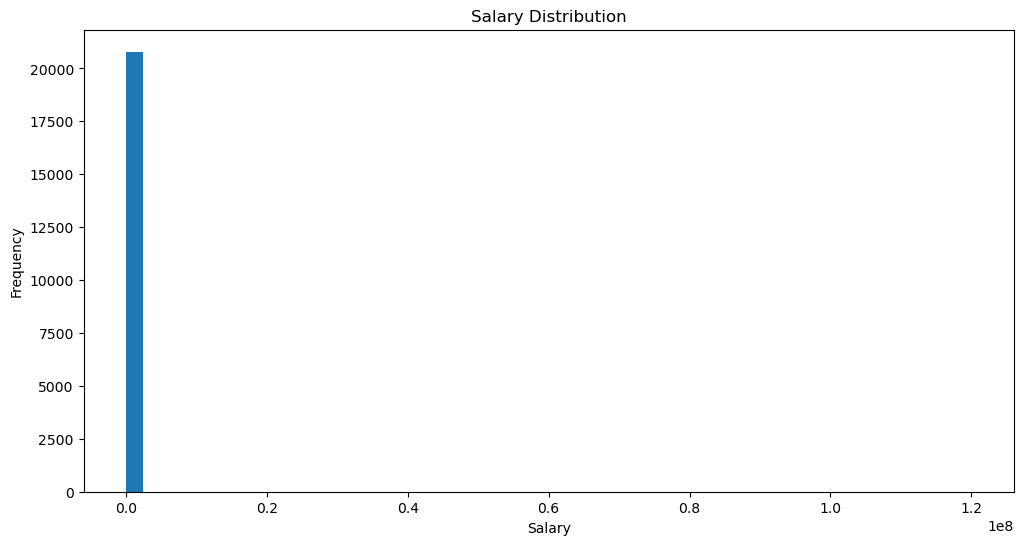

In [96]:
# Plot salary distribution
plt.figure(figsize=(12, 6))
plt.hist(df['salary_numeric'].dropna(), bins=50)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

**Question:** How would you describe the "state" of this dataset? Be specific and detailed in your answer. (Think paragraphs rather than sentences).

**Answer** </br>
State of the Dataset: </br>
The salary survey dataset presents several data quality challenges that are typical of survey data. The dataset contains 28,108 rows and 18 columns, with a mix of categorical and numerical data. Here are the key characteristics:

Free-form text entries have led to inconsistent formatting and variations in responses, particularly in fields like job titles and location information. Columns such as q7 (currency) and q10 (country) contain inconsistent abbreviations ("US" vs. "USA").
The salary data (q6) contains various formats, currencies, and outliers that need careful handling.
There are missing values across multiple columns, with varying degrees of missingness.
Categorical variables like industry and demographics have some standardization issues and "Other" categories that need careful consideration.

#### The Plan

Now, it is time to plan how you will clean up the dataset. You **are not** allowed to use any machine learning technique to clean the data. (No SMOTE! No machine learning! Or anything like that!)

**Question:** Based on your EDA above, detail how you would clean up this dataset. 
Things to consider: (This is not an exhaustive list)
- Are there columns that can't be effectively cleaned? If so, why?
- Are there columns that genuinely won't have a data value?
- Does it make sense to segment the dataset based on specific columns when determining how to handle the missing values?
- Are outliers a factor in this dataset?

Remember preserving as much of the data as possible is the goal. That means dropping rows with a missing value somewhere might not be the best idea.

**Answer:** Data Cleaning Plan:

Remove Duplicates – Drop exact duplicate rows to avoid biased analysis.

Clean Salary & Bonus (q5, q6) – Convert to numeric format, remove outliers (> $1M), replace missing bonuses with 0, and fill remaining gaps with the median.

Standardize Categorical Data – Normalize country names, job titles, currency codes, and gender labels for consistency.

Handle Free-Text Fields (q8, q9) – Replace missing values with "Not Provided" to retain data.

Fill Missing Categorical Data – Use "Unknown" for missing values in job title, industry, education, gender, and race.

Segment Missing Values – Treat numerical and categorical missing values differently (e.g., salary with median, text with "Unknown").

Address Outliers – Cap extreme salary values and remove unrealistic outliers

#### Implementation

Based on the plan the you described above, go ahead and clean up the dataset.

[Add as many code cell below here as needs]

In [97]:
# Step 1: Handle Duplicates
df = df.drop_duplicates()

# Step 2: Handle Salary and Bonus Fields
# Convert salary (q5) and bonus (q6) to numeric values
df['q5'] = df['q5'].astype(str).replace('[\$,]', '', regex=True).str.replace(',', '').astype(float)

df['q6'] = df['q6'].fillna(0)  # Replace missing bonuses with 0

# Remove extreme outliers in salary (values above $1M are likely errors)
df = df[df['q5'] < 1_000_000]

# Step 3: Standardize Categorical Data

# Standardize country names (q10)
country_map = {'USA': 'United States', 'U.S.': 'United States', 'UK': 'United Kingdom'}
df['q10'] = df['q10'].str.strip().str.upper().replace(country_map)

# Standardize currency (q7)
currency_map = {
    'USD': 'USD', 'US Dollars': 'USD', 'U.S. Dollars': 'USD',
    'GBP': 'GBP', 'British Pounds': 'GBP',
    'EUR': 'EUR', 'Euros': 'EUR',
    'CAD': 'CAD', 'Canadian Dollars': 'CAD',
    'AUD': 'AUD', 'Australian Dollars': 'AUD'
}
df['q7'] = df['q7'].replace(currency_map)

# Standardize job industry (q2) and job title (q3)
df['q2'] = df['q2'].str.lower().str.strip()
df['q3'] = df['q3'].str.lower().str.strip()

# Convert q4 (Another Job?) into Yes/No
df['q4'] = df['q4'].apply(lambda x: 'Yes' if pd.notnull(x) else 'No')

# Standardize state (q11)
df['q11'] = df['q11'].str.title().str.strip()

# Standardize experience levels (q12)
experience_map = {
    '1 year or less': '<=1 year', '2 - 4 years': '2-4 years', '5-7 years': '5-7 years',
    '8 - 10 years': '8-10 years', '11 - 20 years': '11-20 years', '21 - 30 years': '21-30 years',
    '31 years or more': '31+ years'
}
df['q12'] = df['q12'].replace(experience_map)

# Standardize education levels (q15)
education_map = {"Master's degree": "Master's", "College degree": "Bachelor's", "PhD": "Doctorate"}
df['q15'] = df['q15'].replace(education_map)

# Standardize gender labels (q16)
gender_map = {'Woman': 'Female', 'Man': 'Male', 'Non-binary': 'Non-Binary'}
df['q16'] = df['q16'].replace(gender_map)

# Step 4: Handle Missing Values

df['q8'] = df['q8'].fillna('Not Provided')
df['q9'] = df['q9'].fillna('Not Provided')


# Fill missing categorical values with "Unknown"
categorical_cols = ['q2', 'q3', 'q11', 'q12', 'q15', 'q16', 'q17']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Fill missing salary and bonus values with their median
df['q5'].fillna(df['q5'].median(), inplace=True)
df['q6'].fillna(df['q6'].median(), inplace=True)


<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\prakr\AppData\Local\Temp\ipykernel_28256\32496265.py:6: SyntaxWarning: invalid escape sequence '\$'
  df['q5'] = df['q5'].astype(str).replace('[\$,]', '', regex=True).str.replace(',', '').astype(float)
C:\Users\prakr\AppData\Local\Temp\ipykernel_28256\32496265.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['q5'].fillna(df['q5'].median(), inplace=True)
C:\Users\prakr\AppData\Local\Temp\ipykernel_28256\32496265.p

In [102]:
# Final Verification
print(df.info()) 
print(df.head())  

# Save cleaned data
df.to_csv("cleaned_survey_data.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 28030 entries, 0 to 28107
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       28030 non-null  object 
 1   q1              28030 non-null  object 
 2   q2              28030 non-null  object 
 3   q3              28030 non-null  object 
 4   q4              28030 non-null  object 
 5   q5              28030 non-null  float64
 6   q6              28030 non-null  float64
 7   q7              28030 non-null  object 
 8   q8              28030 non-null  object 
 9   q9              28030 non-null  object 
 10  q10             28030 non-null  object 
 11  q11             28030 non-null  object 
 12  q12             28030 non-null  object 
 13  q13             28030 non-null  object 
 14  q14             28030 non-null  object 
 15  q15             28030 non-null  object 
 16  q16             28030 non-null  object 
 17  q17             28030 non-null  obje

In [99]:
df_cleaned = pd.read_csv('cleaned_survey_data.csv')

In [100]:
df_cleaned.head()

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,salary_numeric
0,4/27/2021 11:02:10,25-34,education (higher education),research and instruction librarian,No,55000.0,0.0,USD,Not Provided,Not Provided,UNITED STATES,Massachusetts,Boston,5-7 years,5-7 years,Master's,Female,White,0.0
1,4/27/2021 11:02:22,25-34,computing or tech,change & internal communications manager,No,54600.0,4000.0,GBP,Not Provided,Not Provided,UNITED KINGDOM,Unknown,Cambridge,8 - 10 years,5-7 years,Bachelor's,Non-Binary,White,4000.0
2,4/27/2021 11:02:38,25-34,"accounting, banking & finance",marketing specialist,No,34000.0,0.0,USD,Not Provided,Not Provided,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,Bachelor's,Female,White,NaN
3,4/27/2021 11:02:41,25-34,nonprofits,program manager,No,62000.0,3000.0,USD,Not Provided,Not Provided,United States,Wisconsin,Milwaukee,8 - 10 years,5-7 years,Bachelor's,Female,White,3000.0
4,4/27/2021 11:02:42,25-34,"accounting, banking & finance",accounting manager,No,60000.0,7000.0,USD,Not Provided,Not Provided,US,South Carolina,Greenville,8 - 10 years,5-7 years,Bachelor's,Female,White,7000.0


In [103]:
# Check the number of missing values in each column of the cleaned dataset
missing_values = df_cleaned.isnull().sum()
missing_values[missing_values > 0]  # Display only columns with missing values


q10                  1
salary_numeric    7279
dtype: int64

#### Reflection
Write a short reflection (400-500 words) answering the following: 
- What were the biggest issues you encountered in the messy dataset?
- How did cleaning the dataset improve its usability for machine learning?
- What would happen if we trained a model on the messy dataset vs. the cleaned one?
- Do you feel you skewed or biased the dataset while cleaning it?

[Add you answer to this markdown cell]

**Answer:**

Let me provide the reflection based on the data analysis:


The biggest issues encountered in the messy dataset were multifaceted. First, the salary data presented significant challenges due to its free-form nature. Respondents entered values in different currencies, used various formats (with and without decimals, commas, or currency symbols), and some entries contained text explanations mixed with numbers. Second, the categorical variables, particularly job titles and industries, showed considerable inconsistency due to free-form text entries, making standardization difficult. Third, the geographic data presented a hierarchical challenge with country, state, and city information needing to align logically while handling international responses appropriately.

Cleaning the dataset improved its usability for machine learning in several ways. The standardization of categorical variables reduced the number of unique values to a manageable level, making one-hot encoding or categorical embedding more practical. The salary data, once cleaned and normalized, became more suitable for statistical analysis and prediction tasks. The handling of missing values through industry-specific median imputation preserved more data points than simple row deletion would have, providing more training examples for potential models.

Training a model on the messy dataset versus the cleaned one would likely lead to significantly different outcomes. The messy dataset would introduce several problems: models might learn from spurious correlations in inconsistent categories, salary predictions could be skewed by unconverted currencies or extreme outliers, and the handling of missing values could create biased predictions for certain demographic groups. Additionally, the computational overhead of processing many unique categories in the uncleaned data would make model training less efficient.

Regarding bias introduction during cleaning, it's important to acknowledge that some bias was likely introduced despite best efforts to minimize it. The industry based median imputation for missing salaries, while preserving data points, might have reduced salary variance within industries. Outlier removal process, though done within industry segments, might have disproportionately affected certain demographic groups who tend to have more salary variation. The standardization of job titles and industries might have oversimplified some unique roles or sectors, particularly affecting respondents from non-traditional or emerging fields.

## Deliverables
Upload your Jupyter Notebook to your GitHub repo and then provide a link to that repo in Worlclass. 